1/100: lat=-3.7671739551368, lon=-14.241751539353, t_g=2025-07-04 09:05:45
2/100: lat=-4.377844770567, lon=-13.808682554452, t_g=2025-07-04 09:05:57
3/100: lat=-4.9373338619976, lon=-13.411027161196, t_g=2025-07-04 09:06:08
4/100: lat=-5.4965025773504, lon=-13.01264110979, t_g=2025-07-04 09:06:19
5/100: lat=-6.1568809604796, lon=-12.540759482076, t_g=2025-07-04 09:06:32
6/100: lat=-6.7152314211927, lon=-12.140479413744, t_g=2025-07-04 09:06:43
7/100: lat=-7.2731516839101, lon=-11.739192822741, t_g=2025-07-04 09:06:54
8/100: lat=-7.9319043098011, lon=-11.263531079435, t_g=2025-07-04 09:07:07
9/100: lat=-8.4887530209311, lon=-10.859751091869, t_g=2025-07-04 09:07:18
10/100: lat=-9.0955989854205, lon=-10.417795945087, t_g=2025-07-04 09:07:30
11/100: lat=-9.70174131398, lon=-9.9741999426296, t_g=2025-07-04 09:07:42
12/100: lat=-10.307135089623, lon=-9.5288439004014, t_g=2025-07-04 09:07:54
13/100: lat=-10.861376026026, lon=-9.1189571343009, t_g=2025-07-04 09:08:05
14/100: lat=-11.465192197

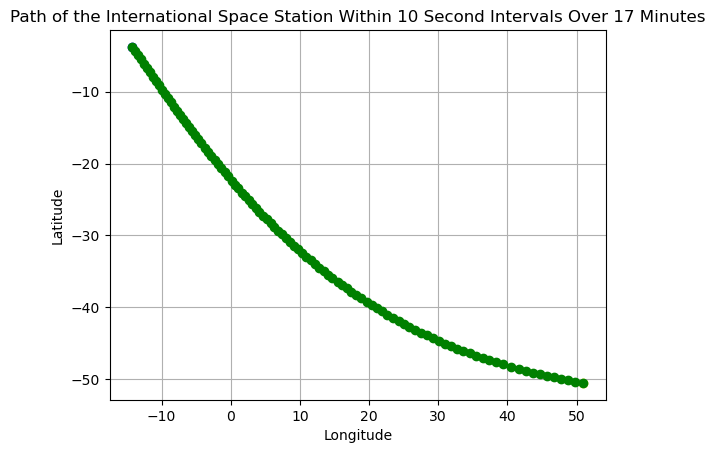

In [1]:
import requests
import matplotlib.pyplot as plt
import time
from datetime import datetime, UTC

lon, lat, t_g = [], [], []

for i in range(1, 101):
    response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
    dictionary = response.json()

    longitude = dictionary["longitude"]
    latitude = dictionary["latitude"]
    unix_timestamp = dictionary["timestamp"]
    readable_timestamp = datetime.fromtimestamp(unix_timestamp, UTC).strftime('%Y-%m-%d %H:%M:%S')

    lon.append(longitude)
    lat.append(latitude)
    t_g.append(readable_timestamp)

    print(f"{i}/100: lat={latitude}, lon={longitude}, t_g={readable_timestamp}")

    time.sleep((17 * 60) / 100)

plt.plot(lon, lat, marker='o', linestyle='-', color='green')
plt.scatter(lon[0], lat[0], color='blue', label='Start')
plt.scatter(lon[-1], lat[-1], color='yellow', label='End')
plt.title("Path of the International Space Station Within 10 Second Intervals Over 17 Minutes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()